<a href="https://colab.research.google.com/github/Zen0007/apple_stock_market_prediction/blob/main/stock_prediction_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from  numpy import hstack, array
import pandas as pd
import yfinance as yf
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
date = yf.download("AAPL",start="2010-01-01",end=datetime.now())
data = pd.DataFrame(date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [ ]:
#data.drop(data.columns[[1,2,4,5]],axis=1,inplace=True)
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60690100


In [ ]:
df = data['Close'].values
df

array([  7.64321423,   7.65642881,   7.53464317, ..., 188.61000061,
       188.08000183, 189.77000427])

In [ ]:
lstm_traning = int(np.ceil(len(df)*.95))
lstm_traning

3233

In [ ]:
lstm_train1 = data.iloc[0:int(lstm_traning),0:1].values
lstm_train2 = data.iloc[0:int(lstm_traning),1:2].values
lstm_train3 = data.iloc[0:int(lstm_traning),2:3].values
lstm_train4 = data.iloc[0:int(lstm_traning),3:4].values
len(lstm_train1)

3233

In [ ]:
lstm_test1 = data.iloc[lstm_traning -60:,0:1].values
lstm_test2 = data.iloc[lstm_traning -60:,1:2].values
lstm_test3 = data.iloc[lstm_traning -60:,2:3].values
lstm_test4 = data.iloc[lstm_traning -60:,3:4].values
len(lstm_test1)

230

In [ ]:
lstm_input_train1 = lstm_train1.reshape(len(lstm_train1),1)
lstm_input_train2 = lstm_train2.reshape(len(lstm_train2),1)
lstm_input_train3 = lstm_train3.reshape(len(lstm_train3),1)
lstm_input_train4 = lstm_train4.reshape(len(lstm_train4),1)
len(lstm_input_train1)

3233

In [ ]:
lstm_input_test1 = lstm_test1.reshape(len(lstm_test1),1)
lstm_input_test2 = lstm_test2.reshape(len(lstm_test2),1)
lstm_input_test3 = lstm_test2.reshape(len(lstm_test3),1)
lstm_input_test4 = lstm_test2.reshape(len(lstm_test4),1)
len(lstm_input_test1)

230

In [ ]:
train_dataset = hstack((lstm_input_train1,lstm_input_train2,lstm_input_train3,lstm_input_train4))
train_dataset

array([[  7.62249994,   7.66071415,   7.58500004,   7.64321423],
       [  7.66428614,   7.69964314,   7.61607122,   7.65642881],
       [  7.65642881,   7.68678617,   7.52678585,   7.53464317],
       ...,
       [155.08000183, 155.44999695, 149.13000488, 150.6499939 ],
       [148.94999695, 152.16999817, 145.        , 145.02999878],
       [142.05999756, 142.80000305, 138.75      , 138.88000488]])

In [ ]:
test_dataset = hstack((lstm_input_test1,lstm_input_test2,lstm_input_test3,lstm_input_test4))
test_dataset

array([[170.05999756, 170.99000549, 170.99000549, 170.99000549],
       [169.82000732, 172.16999817, 172.16999817, 172.16999817],
       [171.52000427, 173.38999939, 173.38999939, 173.38999939],
       [172.77999878, 173.71000671, 173.71000671, 173.71000671],
       [172.77000427, 176.1499939 , 176.1499939 , 176.1499939 ],
       [173.75      , 174.8999939 , 174.8999939 , 174.8999939 ],
       [173.02999878, 173.74000549, 173.74000549, 173.74000549],
       [169.69000244, 169.86000061, 169.86000061, 169.86000061],
       [167.08000183, 168.71000671, 168.71000671, 168.71000671],
       [167.32000732, 168.11000061, 168.11000061, 168.11000061],
       [168.77999878, 170.13999939, 170.13999939, 170.13999939],
       [170.57000732, 171.05000305, 171.05000305, 171.05000305],
       [161.1499939 , 162.8999939 , 162.8999939 , 162.8999939 ],
       [162.13000488, 162.55999756, 162.55999756, 162.55999756],
       [160.30999756, 160.58000183, 160.58000183, 160.58000183],
       [156.63999939, 158

In [ ]:
def veriyi_bol(veri, n_steps):
    X, y = [], []
    for i in range(len(veri) - n_steps + 1):
        end_ix = i + n_steps
        seq_x, seq_y = veri[i:end_ix, :-1], veri[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps = 5

In [ ]:
x_train,y_train = veriyi_bol(train_dataset,n_steps)
x_train

array([[[  7.62249994,   7.66071415,   7.58500004],
        [  7.66428614,   7.69964314,   7.61607122],
        [  7.65642881,   7.68678617,   7.52678585],
        [  7.5625    ,   7.57142878,   7.46607113],
        [  7.51071405,   7.57142878,   7.46642923]],

       [[  7.66428614,   7.69964314,   7.61607122],
        [  7.65642881,   7.68678617,   7.52678585],
        [  7.5625    ,   7.57142878,   7.46607113],
        [  7.51071405,   7.57142878,   7.46642923],
        [  7.5999999 ,   7.60714293,   7.44464302]],

       [[  7.65642881,   7.68678617,   7.52678585],
        [  7.5625    ,   7.57142878,   7.46607113],
        [  7.51071405,   7.57142878,   7.46642923],
        [  7.5999999 ,   7.60714293,   7.44464302],
        [  7.47107077,   7.491786  ,   7.37214279]],

       ...,

       [[150.96000671, 151.99000549, 148.03999329],
        [148.07000732, 149.05000305, 144.13000488],
        [148.19999695, 157.5       , 147.82000732],
        [153.16000366, 154.24000549, 151.9199

In [ ]:
y_train

array([  7.570714  ,   7.50392914,   7.418571  , ..., 150.6499939 ,
       145.02999878, 138.88000488])

In [ ]:
x_test,y_test = veriyi_bol(test_dataset,n_steps)
x_test

array([[[170.05999756, 170.99000549, 170.99000549],
        [169.82000732, 172.16999817, 172.16999817],
        [171.52000427, 173.38999939, 173.38999939],
        [172.77999878, 173.71000671, 173.71000671],
        [172.77000427, 176.1499939 , 176.1499939 ]],

       [[169.82000732, 172.16999817, 172.16999817],
        [171.52000427, 173.38999939, 173.38999939],
        [172.77999878, 173.71000671, 173.71000671],
        [172.77000427, 176.1499939 , 176.1499939 ],
        [173.75      , 174.8999939 , 174.8999939 ]],

       [[171.52000427, 173.38999939, 173.38999939],
        [172.77999878, 173.71000671, 173.71000671],
        [172.77000427, 176.1499939 , 176.1499939 ],
        [173.75      , 174.8999939 , 174.8999939 ],
        [173.02999878, 173.74000549, 173.74000549]],

       ...,

       [[193.77999878, 193.88000488, 193.88000488],
        [191.57000732, 192.97999573, 192.97999573],
        [189.83999634, 192.02000427, 192.02000427],
        [191.41000366, 192.66999817, 192.6699

In [ ]:
y_test

array([176.1499939 , 174.8999939 , 173.74000549, 169.86000061,
       168.71000671, 168.11000061, 170.13999939, 171.05000305,
       162.8999939 , 162.55999756, 160.58000183, 158.41999817,
       160.36000061, 157.08999634, 156.66999817, 156.36000061,
       157.82000732, 164.25999451, 160.53999329, 157.1000061 ,
       155.24000549, 151.3500061 , 154.55999756, 158.08000183,
       158.74000549, 154.47000122, 151.47000122, 153.77000427,
       154.72000122, 150.63999939, 146.72000122, 143.1000061 ,
       143.07000732, 146.22000122, 147.38000488, 147.53999329,
       143.1000061 , 141.88999939, 141.3500061 , 140.36000061,
       143.58999634, 144.52000427, 142.8999939 , 146.69999695,
       144.94999695, 145.88999939, 147.8500061 , 150.22999573,
       152.49000549, 151.99000549, 149.05000305, 157.5       ,
       154.24000549, 155.44999695, 152.16999817, 142.80000305,
       142.66999817, 139.1499939 , 141.42999268, 138.55000305,
       146.86999512, 150.00999451, 150.27999878, 153.58

In [ ]:
x_train.shape

(3229, 5, 3)

In [ ]:
feature = x_train.shape[2]
feature

3

In [ ]:
model = Sequential()
model.add(LSTM(128,activation='relu',input_shape=(n_steps,feature),return_sequences=True,recurrent_dropout=0.3))
model.add(Dropout(0.2))
model.add(LSTM(25,activation='relu',input_shape=(n_steps,feature),recurrent_dropout=0.3))
model.add(Dropout(0.3))
model.add(Dense(1,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_79 (LSTM)              (None, 5, 128)            67584     
                                                                 
 dropout_74 (Dropout)        (None, 5, 128)            0         
                                                                 
 lstm_80 (LSTM)              (None, 25)                15400     
                                                                 
 dropout_75 (Dropout)        (None, 25)                0         
                                                                 
 dense_63 (Dense)            (None, 1)                 26        
                                                                 
 dense_64 (Dense)            (None, 1)                 2         
                                                                 
Total params: 83,012
Trainable params: 83,012
Non-tra

In [ ]:
model.compile(loss='mape',optimizer='RMSprop',metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs=70,verbose=2,batch_size=70,validation_split=0.2)

Epoch 1/70
37/37 - 7s - loss: 32.9972 - mae: 9.5346 - val_loss: 3.8045 - val_mae: 5.2600 - 7s/epoch - 201ms/step
Epoch 2/70
37/37 - 1s - loss: 22.6800 - mae: 6.6119 - val_loss: 4.3324 - val_mae: 5.9349 - 1s/epoch - 29ms/step
Epoch 3/70
37/37 - 1s - loss: 20.3165 - mae: 5.8765 - val_loss: 7.8513 - val_mae: 10.7480 - 1s/epoch - 29ms/step
Epoch 4/70
37/37 - 1s - loss: 20.5409 - mae: 6.0610 - val_loss: 2.7962 - val_mae: 3.8434 - 1s/epoch - 29ms/step
Epoch 5/70
37/37 - 1s - loss: 19.2630 - mae: 5.6072 - val_loss: 10.2634 - val_mae: 13.8010 - 1s/epoch - 29ms/step
Epoch 6/70
37/37 - 1s - loss: 19.0613 - mae: 5.4928 - val_loss: 4.5449 - val_mae: 6.1644 - 1s/epoch - 28ms/step
Epoch 7/70
37/37 - 2s - loss: 18.9924 - mae: 5.4834 - val_loss: 12.0319 - val_mae: 16.3888 - 2s/epoch - 42ms/step
Epoch 8/70
37/37 - 1s - loss: 18.3068 - mae: 5.2711 - val_loss: 7.3683 - val_mae: 10.0562 - 1s/epoch - 39ms/step
Epoch 9/70
37/37 - 1s - loss: 17.7543 - mae: 5.1425 - val_loss: 2.1889 - val_mae: 2.9926 - 1s/epo

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
loss , mae = model.evaluate(x_test,y_test)
loss , mae = model.evaluate(x_train,y_train)
print(f"loss{loss}")
print(f"mae{mae}")

101/101 [==============================] - 1s 6ms/step - loss: 5.1509 - mae: 3.7219
loss5.150902271270752
mae3.721883773803711


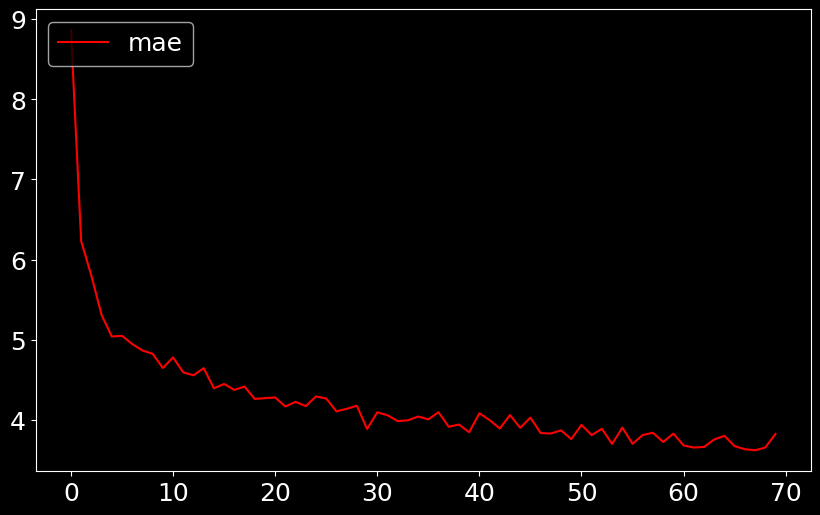

In [ ]:
plt.figure(figsize=(10,6))
#plt.plot(history.history['loss'], color='teal', label='val_mae')
plt.plot(history.history['mae'], color='red', label='mae')
plt.legend(loc="upper left")
plt.show()

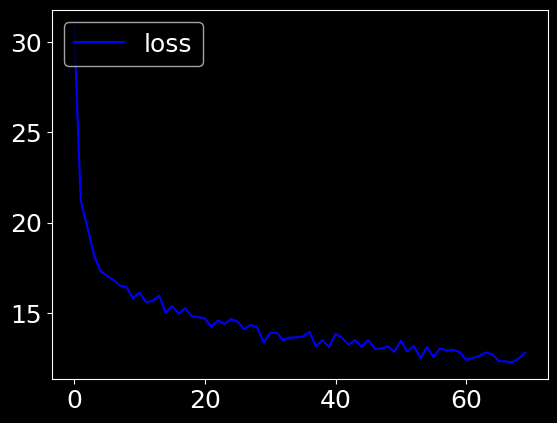

In [ ]:
plt.subplot()
#plt.plot(history.history['val_loss'], color='blue', label='val_loss')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.legend(loc="upper left")
plt.show()

In [ ]:
x_test

array([[[170.05999756, 170.99000549, 170.99000549],
        [169.82000732, 172.16999817, 172.16999817],
        [171.52000427, 173.38999939, 173.38999939],
        [172.77999878, 173.71000671, 173.71000671],
        [172.77000427, 176.1499939 , 176.1499939 ]],

       [[169.82000732, 172.16999817, 172.16999817],
        [171.52000427, 173.38999939, 173.38999939],
        [172.77999878, 173.71000671, 173.71000671],
        [172.77000427, 176.1499939 , 176.1499939 ],
        [173.75      , 174.8999939 , 174.8999939 ]],

       [[171.52000427, 173.38999939, 173.38999939],
        [172.77999878, 173.71000671, 173.71000671],
        [172.77000427, 176.1499939 , 176.1499939 ],
        [173.75      , 174.8999939 , 174.8999939 ],
        [173.02999878, 173.74000549, 173.74000549]],

       ...,

       [[193.77999878, 193.88000488, 193.88000488],
        [191.57000732, 192.97999573, 192.97999573],
        [189.83999634, 192.02000427, 192.02000427],
        [191.41000366, 192.66999817, 192.6699

In [ ]:
pred = model.predict(x_test)
pred

8/8 [==============================] - 1s 6ms/step


array([[155.51923 ],
       [156.15057 ],
       [156.66127 ],
       [156.28041 ],
       [156.28072 ],
       [155.0601  ],
       [154.11456 ],
       [152.87877 ],
       [151.10397 ],
       [151.0381  ],
       [150.291   ],
       [148.46434 ],
       [145.90454 ],
       [144.50479 ],
       [143.48259 ],
       [142.59941 ],
       [142.77502 ],
       [142.87863 ],
       [142.49846 ],
       [142.59122 ],
       [143.3241  ],
       [143.51187 ],
       [141.57797 ],
       [140.5207  ],
       [140.02646 ],
       [138.81361 ],
       [140.00792 ],
       [140.79506 ],
       [140.3162  ],
       [137.84766 ],
       [136.64232 ],
       [136.02994 ],
       [134.70253 ],
       [132.99721 ],
       [131.20987 ],
       [130.74002 ],
       [130.65733 ],
       [131.46635 ],
       [131.12408 ],
       [130.00742 ],
       [128.41765 ],
       [128.6805  ],
       [128.08734 ],
       [129.3468  ],
       [130.01384 ],
       [130.87187 ],
       [130.97623 ],
       [132.6

<ipython-input-926-c9f033be76b3>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(y_test, 'b',color = 'blue', label='Training loss')
<ipython-input-926-c9f033be76b3>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(pred, 'b',color='red', label='Validation loss')


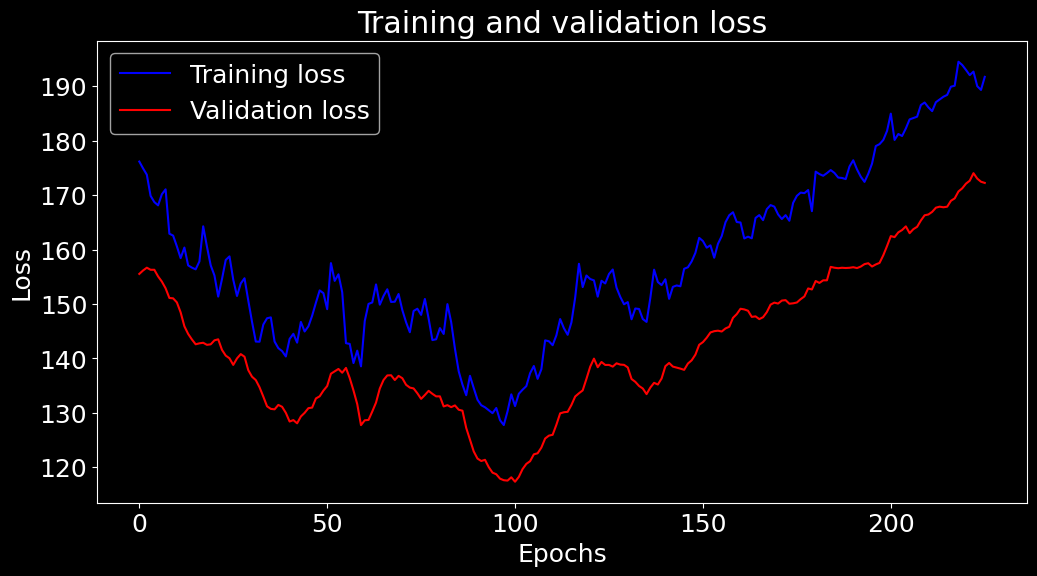

In [926]:

plt.plot(y_test, 'b',color = 'blue', label='Training loss')
plt.plot(pred, 'b',color='red', label='Validation loss')
#plt.plot( df,color='blue', label='close')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xticks()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [ ]:
pred2 = model.predict(x_train)
pred2

101/101 [==============================] - 1s 7ms/step


array([[  7.850209],
       [  7.836158],
       [  7.79873 ],
       ...,
       [136.28313 ],
       [135.30856 ],
       [135.8808  ]], dtype=float32)

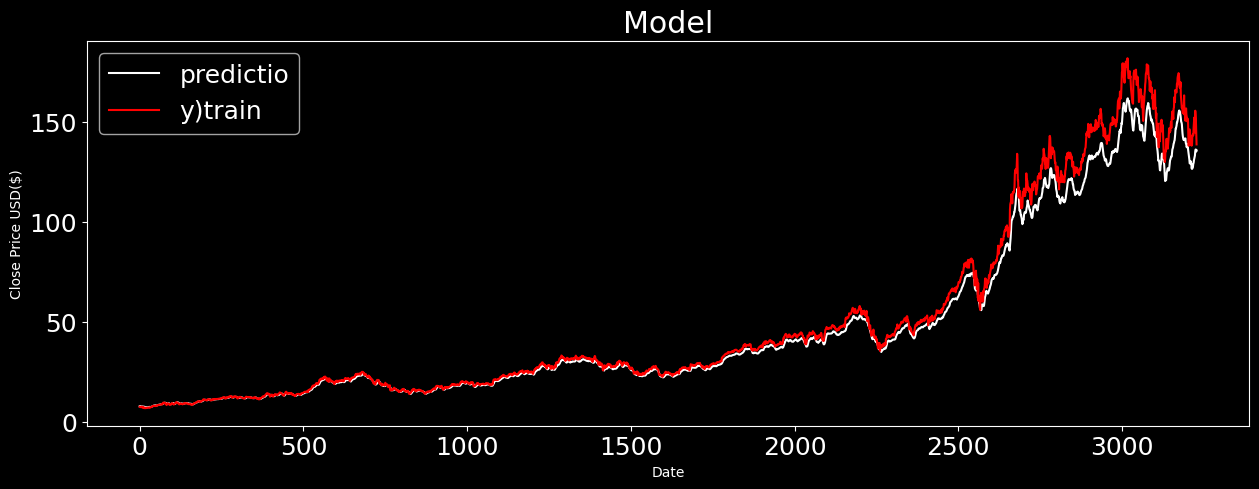

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Model')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price USD($)',fontsize=10)
plt.plot(pred2,color='white',label='predictio')
plt.plot(y_train,color='red',label='y)train')
plt.legend()

In [ ]:
import numpy as np


In [925]:
data = yf.download('AAPL', start='2019-01-01', end=datetime.now())
closing_prices = data['Close'].values

max_price = np.max(closing_prices)
min_price = np.min(closing_prices)
normalized_prices = (closing_prices - min_price) / (max_price - min_price)

n_steps = 5
new_data = []
for i in range(len(normalized_prices) - n_steps + 1):
    new_data.append(normalized_prices[i:i+n_steps])

new_data = np.array(new_data)

reshape_shape = (5, 3)
required_length = np.prod(reshape_shape)
if len(new_data) % required_length != 0:
    new_data = new_data[:-(len(new_data) % required_length)]

new_data = new_data.reshape(-1, *reshape_shape)

predictions = model.predict(new_data)

predictions = predictions * (max_price - min_price) + min_price


last_closing_price = closing_prices[-1]


predicted_price_tomorrow = predictions[-1][0]

price_difference = predicted_price_tomorrow - last_closing_price

print("Last Closing Price:", last_closing_price)
print("Predicted Price Tomorrow:", predicted_price_tomorrow)
print("Price Difference:", price_difference)

[*********************100%***********************]  1 of 1 completed
12/12 [==============================] - 0s 6ms/step
Last Closing Price: 189.77000427246094
Predicted Price Tomorrow: 340.3009
Price Difference: 150.53089904785156
